### Análisis exploratorio de los datos

Importamos las librerias necesarias

In [125]:
# Librería para manejo y análisis de estructuras de datos
import pandas as pd 

# librería para la creación de gráficos en dos dimensiones
import matplotlib.pyplot as plt

# Libreria de visualizacion de datos 
import seaborn as sns

# Libreria para cálculo matemático y manejo de arrays
import numpy as np

Leemos los datasets y creamos el Dataframe con el que trabajaremos "data_train" y con el que realizaremos las predicciones "data_test"

In [134]:
data_train = pd.read_csv(r"C:\Users\Usuario\Desktop\Machine Learning\Datathon\hospitalizaciones_train.csv")
data_test = pd.read_csv(r"C:\Users\Usuario\Desktop\Machine Learning\Datathon\hospitalizaciones_test.csv")

Exploramos la información de los datasets, corroboro la existencia de datos nulos

In [127]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [128]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Available Extra Rooms in Hospital  90000 non-null  int64  
 1   Department                         90000 non-null  object 
 2   Ward_Facility_Code                 90000 non-null  object 
 3   doctor_name                        90000 non-null  object 
 4   staff_available                    90000 non-null  int64  
 5   patientid                          90000 non-null  int64  
 6   Age                                90000 non-null  object 
 7   gender                             90000 non-null  object 
 8   Type of Admission                  90000 non-null  object 
 9   Severity of Illness                90000 non-null  object 
 10  health_conditions                  90000 non-null  object 
 11  Visitors with Patient              90000 non-null  int

In [129]:
print ('Registros nulos en train: ' , data_train.isna().sum().sum())
print ('Registros nulos en test: ' , data_test.isna().sum().sum())

Registros nulos en train:  0
Registros nulos en test:  0


Corroboro la existencia de duplicados

In [130]:
data_train[data_train.duplicated()]
print ('Registros duplicados en train:' , data_train.duplicated().sum())

data_test[data_test.duplicated()]
print ('Registros duplicados en test:' , data_test.duplicated().sum())

Registros duplicados en train: 0
Registros duplicados en test: 0


 Creo una columna 'Stay', en base a la columna 'Stay (in days)'. Obtengo 0 para estadias cortas, la cual se considera que es 8 o menos dias, y obtengo 1 para estadias largas, consideradas de 8 dias en adelante

In [135]:
data_train["Stay"]=np.where(data_train["Stay (in days)"]>8,1,0)

In [136]:
data_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days),Stay
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8,0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9,1
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7,0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8,0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34,1


Convertimos los datos de las features en datos numericos

In [138]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [139]:
data_train["Department"]=le.fit_transform(data_train["Department"])
data_train["doctor_name"]=le.fit_transform(data_train["doctor_name"])
data_train["Age"]=le.fit_transform(data_train["Age"])
data_train["gender"]=le.fit_transform(data_train["gender"])
data_train["Type of Admission"]=le.fit_transform(data_train["Type of Admission"])
data_train["Severity of Illness"]=le.fit_transform(data_train["Severity of Illness"])
data_train["health_conditions"]=le.fit_transform(data_train["health_conditions"])
data_train["Insurance"]=le.fit_transform(data_train["Insurance"])

In [140]:
# Corroboro la conversion
data_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days),Stay
0,4,2,D,8,0,33070,4,0,1,0,1,4,1,2966.408696,8,0
1,4,2,B,8,2,34808,3,0,1,1,2,2,0,3554.835677,9,1
2,2,2,B,8,8,44577,2,0,1,0,1,2,1,5624.733654,7,0
3,4,2,D,4,7,3695,3,0,2,2,4,4,0,4814.149231,8,0
4,2,1,E,2,10,108956,7,1,1,2,1,2,0,5169.269637,34,1


Utilizo método de correlación, para la selección de features


In [141]:
data_train_corr=data_train.corr()
data_train.corr()

,Available Extra Rooms in Hospital,Department,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days),Stay
Available Extra Rooms in Hospital,1.000000,-0.021235,0.015253,-0.003064,-0.005426,-0.029921,-0.038214,0.020866,0.024045,0.001643,0.071073,0.002438,-0.050775,-0.019383,0.053894
Department,-0.021235,1.000000,0.241001,0.016304,0.002997,0.013096,0.016474,-0.037395,0.014698,-0.000344,-0.034597,-0.000714,-0.009166,-0.204050,-0.173021
doctor_name,0.015253,0.241001,1.000000,-0.001162,-0.007540,-0.308142,-0.420330,-0.035731,-0.003980,-0.475721,-0.039543,-0.003544,-0.023484,-0.444867,-0.172526
staff_available,-0.003064,0.016304,-0.001162,1.000000,-0.000350,0.001818,0.003960,-0.002255,0.002759,-0.001500,0.001444,0.001245,0.000816,0.006673,0.002883
patientid,-0.005426,0.002997,-0.007540,-0.000350,1.000000,0.009765,0.010714,0.022615,-0.011138,0.002306,-0.006393,0.001827,0.011602,0.005567,-0.000532
Age,-0.029921,0.013096,-0.308142,0.001818,0.009765,1.000000,0.497530,0.005304,0.023350,0.037140,0.030136,-0.002472,0.016743,0.585201,0.229657
gender,-0.038214,0.016474,-0.420330,0.003960,0.010714,0.497530,1.000000,0.031566,0.029147,-0.000242,0.048435,0.001657,0.038189,0.589757,0.193878
Type of Admission,0.020866,-0.037395,-0.035731,-0.002255,0.022615,0.005304,0.031566,1.000000,-0.070795,0.001768,-0.020353,-0.002062,0.016885,0.035811,0.006233
Severity of Illness,0.024045,0.014698,-0.003980,0.002759,-0.011138,0.023350,0.029147,-0.070795,1.000000,0.214291,0.030199,0.001924,0.005637,0.024316,0.017030
health_conditions,0.001643,-0.000344,-0.475721,-0.001500,0.002306,0.037140,-0.000242,0.001768,0.214291,1.000000,-0.000117,0.008702,0.000412,0.001772,-0.002568


Para una mejor y mas clara lectura, realizo una grafica de calor en base a las correlaciones

<AxesSubplot:>

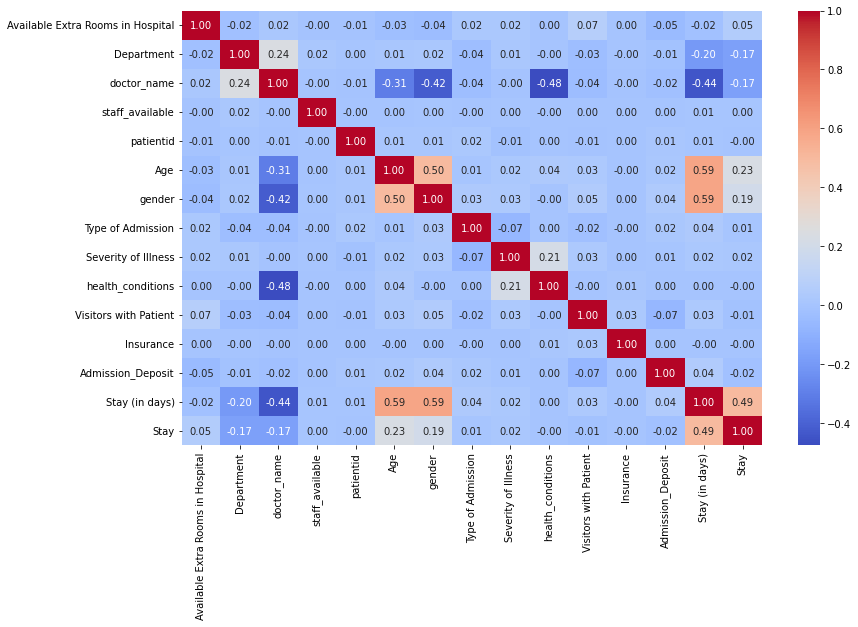

In [142]:
plt.figure(figsize=(13,8))
sns.heatmap(data_train_corr, cbar = True,  square = False, annot=True, fmt= '.2f',cmap= 'coolwarm') 

Selecciono las features que utilizaré con mi modelo

In [144]:
data_train_colum = data_train[['doctor_name', 'Age', 'gender']]

Separamos el dataframe en features y etiquetas. Llamaremos **X** a los features e **y** a las etiquetas

In [145]:
X = data_train_colum # Lo llamamos con X mayuscula ya que incluye más de un atributo
y = data_train['Stay'] # Etiqueta a predecir

Tenemos las variables predictoras **X**, por un lado, y la varible a predecir **y**, por el otro, crearemos un modelo de árbol de decisión.

In [146]:
# Modulo que permite entrenar árboles de decisión
from sklearn.tree import DecisionTreeClassifier

# Modulo para realizar la cross-validation
from sklearn.model_selection import cross_validate 
from IPython.display import clear_output

Separamos los datos en entrenamiento y de testeo. Utilizaremos el 20% del dataset para evaluar

In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

Realizamos cross validation para definir la profundidad que tendra nuestro árbol:  *hiperparametro*

In [148]:
tree_train_scores_mean = []
tree_test_scores_mean = []

max_deep_list = np.arange(1,15,1)
i = 0
i_max = len(max_deep_list)
for profundidad in max_deep_list:
    i = i + 1
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)   
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_test_scores_mean.append(tree_scores['test_score'].mean())

Grafico los datos obtenidos

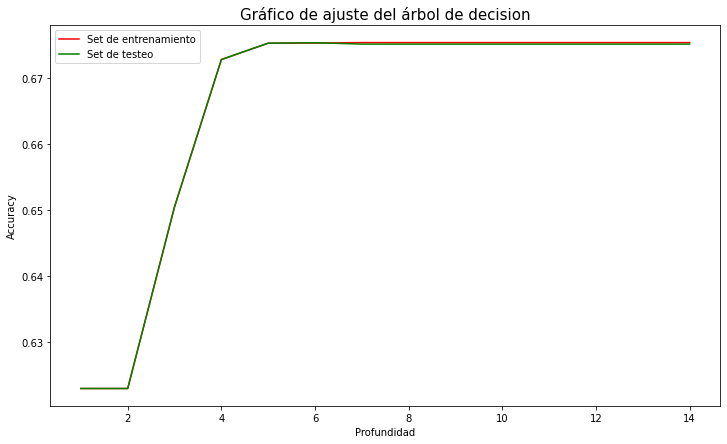

In [149]:
plt.figure(figsize= (12,7))
plt.plot(max_deep_list, tree_train_scores_mean, color="r", label="Set de entrenamiento")
plt.plot(max_deep_list, tree_test_scores_mean, color="g", label="Set de testeo")
plt.title('Gráfico de ajuste del árbol de decision', fontsize = 15)
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad')
plt.show()

**NOTA**: Observamos que el punto con mayor precisión, en los datos de testeo, lo obtenemos con un nivel de profundidad de 4 nodos. A partir de ahi, el modelo comienza a sobreajustar. 

Instanciamos nuestro modelo de árbol de decisión

In [150]:
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier(max_depth = 4, random_state = 42) 

Entrenamos el modelo

In [151]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [153]:
# Exploramos algunas de las características del modelo entrenado

print(model.classes_)
print(model.n_classes_)
print(model.max_features_)
print(model.feature_importances_)

[0 1]
2
3
[0.16730498 0.76006871 0.07262631]


Ploteamos la importancia de los atributos elegidos a la hora de hacer la predicción

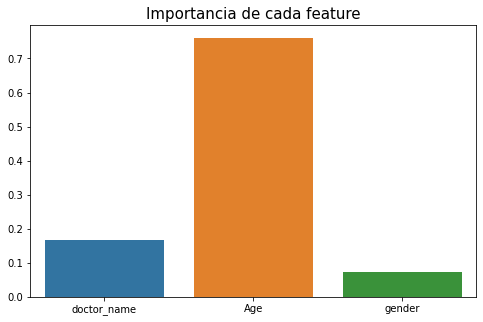

In [155]:
plt.figure(figsize = (8,5))

importances = model.feature_importances_
columns = X.columns
sns.barplot(x = columns, y = importances)
plt.title('Importancia de cada feature', fontsize = 15)
plt.show()

Visualizamos el arbol de decisión

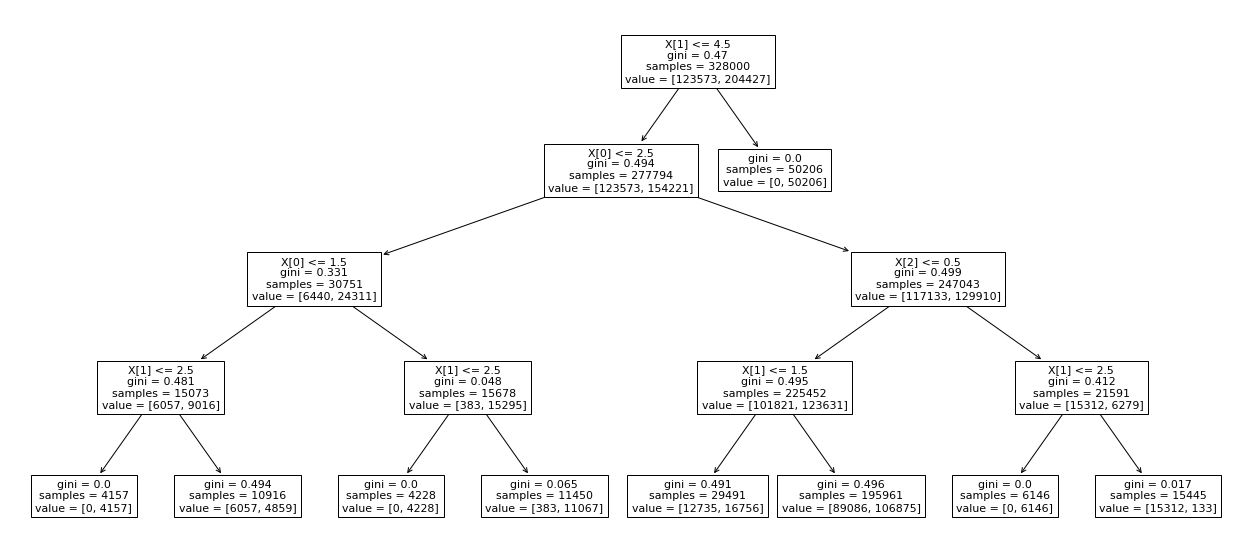

In [156]:
from sklearn import tree

plt.figure(figsize = (22,10))
tree.plot_tree(model.fit(X_train,y_train))
plt.show()

In [157]:
#Predecimos con el modelo creado
y_train_pred = model.predict(X_train)

# Predecimos sobre nuestro set de testeo
y_test_pred = model.predict(X_test)

Evaluaremos nuestro modelo de clasificación

- Matriz de confusión

In [158]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_train, y_train_pred)

Grafico de matriz de confusión

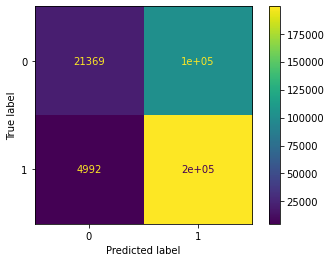

In [161]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(matrix)

cm_display.plot()
plt.show()


- Exactitud

In [162]:
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_test_pred)
print(exactitud)

0.6710365853658536


- Precisión

In [163]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_test_pred)
print(precision)

0.6592524802376784


- Recall

In [164]:
from sklearn.metrics import recall_score

precision = recall_score(y_test, y_test_pred)
print(precision)

0.9748180980211418


## Predicción

Se toma el dataframe creado al comienzo"data_test" y se realiza la predicción con nuestro modelo.

In [165]:
# Tomamos las features que aportan

data_test = data_test[['doctor_name', 'Age', 'gender']]

In [166]:
# Convertimos las features en datos numericos

data_test["doctor_name"]=le.fit_transform(data_test["doctor_name"])
data_test["Age"]=le.fit_transform(data_test["Age"])
data_test["gender"]=le.fit_transform(data_test["gender"])


In [167]:
#Se definen las variables independientes

X_new=data_test[['doctor_name', 'Age', 'gender']]


In [168]:
#predecimos con el modelo entrenado

y_pred_new= model.predict(X_new)

In [169]:
prediccion=pd.DataFrame(y_pred_new.reshape(-1,1),columns=["pred"])
prediccion

,pred
0,1
1,1
2,1
3,1
4,1
...,...
89995,1
89996,1
89997,1
89998,1


Exportamos a csv

In [170]:
prediccion.to_csv("Sofiortiz.csv",index=False)